In [4]:
import obspy
from scipy.io.wavfile import read, write
from obspy import Trace, UTCDateTime
import datetime
import numpy as np 
import glob
import matplotlib.pyplot as plt

In [5]:
def calib(data, S):
    return data / ((10)**(S/20)) * (10**(-6))

In [6]:
path = '/Volumes/2023/20230609-20230625KeeLung/wav'
file = f'{path}/7080.230619200002.wav'

S = -176.2 # end to end 

In [7]:
rate, data = read(file)
data = calib(data, S)

strtime = file.rsplit('.')[1]
mm = strtime[2:4]
dd = strtime[4:6]
hh = strtime[6:8]
print(mm,dd,hh)

FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/2023/20230609-20230625KeeLung/wav/7080.230619200002.wav'

In [3]:
tr = Trace()
tr.data = data
tr.stats.sampling_rate = rate
tr.stats.starttime = UTCDateTime(f'2023-{mm}-{dd}T{hh}:00:00')

tr.filter('bandpass',freqmin=300, freqmax=900, corners=4, zerophase=True)
tr.plot()

NameError: name 'Trace' is not defined

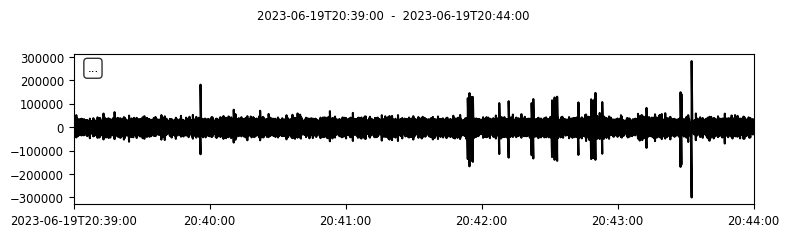

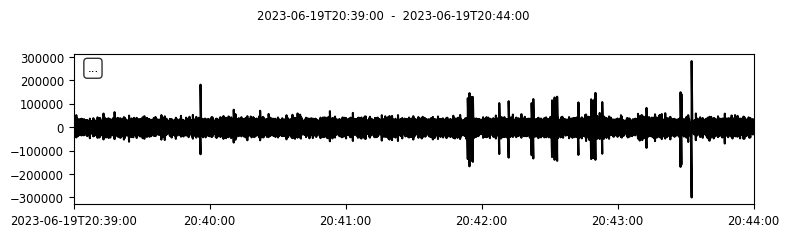

In [8]:
slice_min = 41*60
length = 3*60
minn = int(slice_min/60) 
tr_fish = tr.copy()
tr_fish = tr_fish.slice(tr_fish.stats.starttime+slice_min, tr_fish.stats.starttime+slice_min+length)
tr_fish.plot()

In [1]:
1024/96000

0.010666666666666666

In [91]:
# file_name = f"fish_23{mm}{dd}{hh}{minn}_bp"
# write(f'./{file_name}.wav', rate, tr_fish.data.astype(np.float32)/1000000)

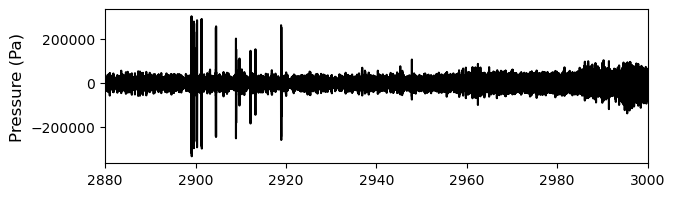

In [93]:
plt.figure(figsize=(7, 2))
plt.plot(tr_fish.times(reftime=tr.stats.starttime), tr_fish.data, 'k')
plt.xlim(tr_fish.times(reftime=tr.stats.starttime)[0], tr_fish.times(reftime=tr.stats.starttime)[-1])
plt.ylabel("Pressure (Pa)", fontsize=12)

# plt.savefig(f'../Results/sound/{file_name}.png')